In [1]:
from sympy import MatrixSymbol, Matrix, Identity
!pip install control
import sympy as sym
import pandas as pd

sym.init_printing()
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import control
import random

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.8/432.8 KB 8.7 MB/s eta 0:00:00


**Ecuación del movimiento uniformemente acelerado**

$$y = \frac{1}{2}g.t^2+v_0.t+y0$$

In [7]:
t = np.array([0,1,2,3,4])
ym = np.array([0.07,35.096,60.409,75.900,81.609])
vf = np.array([40,30.2,20.4,10.6,0.8])

In [36]:
data_experimento = pd.DataFrame(data = {'t':t,'ym':ym,'vf':vf})
data_experimento 

,t,ym,vf
0,0,0.070,40.0
1,1,35.096,30.2
2,2,60.409,20.4
3,3,75.900,10.6
4,4,81.609,0.8


In [37]:
data = pd.DataFrame(data = {'t':t,'y':ym})
data['ones'] = 1
data

,t,y,ones
0,0,0.070,1
1,1,35.096,1
2,2,60.409,1
3,3,75.900,1
4,4,81.609,1


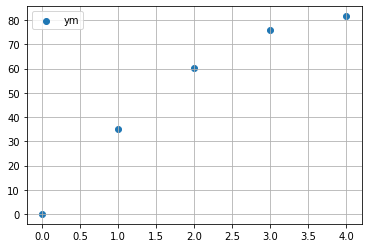

In [38]:
plt.scatter(t,ym, label ='ym')
plt.legend()
plt.grid()

In [39]:
t0 = t**0
t1 = t**1
t2 = t**2

**Matriz W**

*Con valor de varianzas*

In [40]:
var = np.array(ym)
_var = var**0.1
N = 5

W = np.eye(N)*var
_W = np.eye(N)*_var

In [41]:
# Calculando la matriz Moore - Penrose
phi = np.array([t0, t1, t2]).transpose()

# Vectores "y" y "phi" Normalizados usando W
_y = np.dot(_W,ym)
_phi = np.dot(_W,phi)

In [42]:
## Calculando los estimados THETA
phi_pr = np.dot(_phi.transpose(),_phi)
A = np.linalg.inv(phi_pr)
B = np.dot(_phi.transpose(),_y)

## Vector de parámetros estimados
theta = np.dot(A,B)
theta

array([ 0.04503169, 39.96179135, -4.89252541])

In [45]:
g = theta[2]*(-2)
v = theta[1]
y0 = theta[0]

("gravedad: ",g, "v0: ", v, "y0:", y0)

('gravedad: ',
 9.785050815504087,
 'v0: ',
 39.961791350101336,
 'y0:',
 0.04503168685368254)

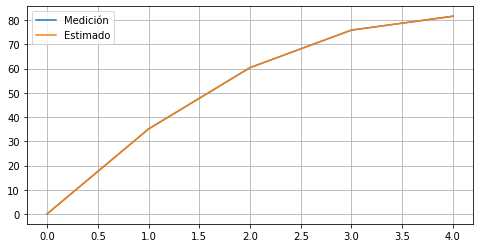

In [46]:
##  Estimación vs Medición
y_e = theta[2]*(t**2)+theta[1]*t+theta[0] 
plt.figure(figsize=(8,4))

plt.plot(t,ym)
plt.plot(t,y_e)

plt.legend(["Medición","Estimado"])
plt.grid()